<a href="https://colab.research.google.com/github/Sam-415/Marketing-research-methods---Samhita_-Jio-Institute/blob/10th-Feb--Assignment/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns in dataset: Index(['rowid', 'orderid', 'orderdate', 'orderpriotority', 'orderquantity',
       'sales', 'discount', 'shipmode', 'profit', 'unitprice', 'shippingcosts',
       'customername', 'province', 'region', 'customersegment',
       'productcategory', 'productsubcategory', 'productname',
       'productcontainer', 'productbasemargin', 'shipdate', 'dataset'],
      dtype='object')


<ipython-input-1-605d9063c1c1>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["orderdate"] = pd.to_datetime(df["orderdate"], errors="coerce")
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyapaqsx0/zul9h7rq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyapaqsx0/j2swzp0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49231', 'data', 'file=/tmp/tmpyapaqsx0/zul9h7rq.json', 'init=/tmp/tmpyapaqsx0/j2swzp0t.json', 'output', 'file=/tmp/tmpyapaqsx0/prophet_modelwz919qox/prophet_model-20250210063439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:34:39 - cmdstanpy - INFO - Chain [1] start proc

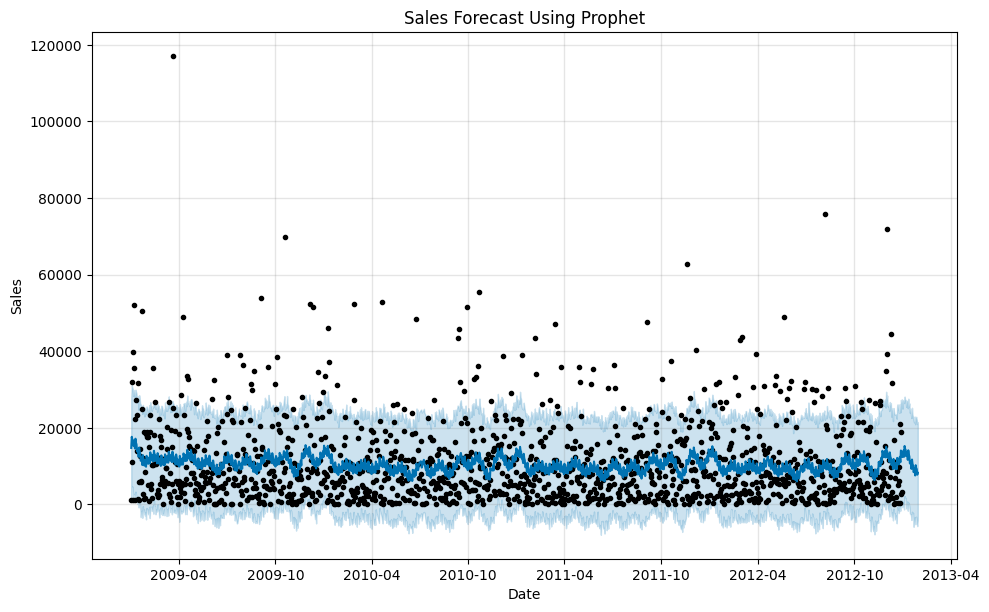

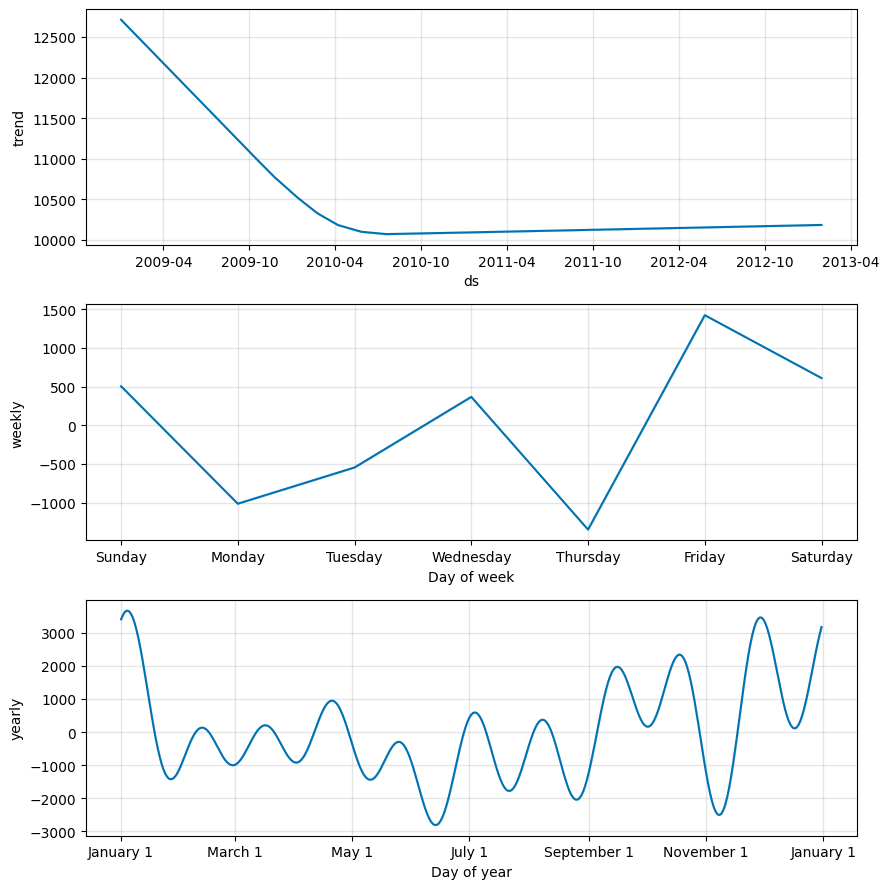

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet  # Use 'prophet' instead of 'fbprophet' for newer versions

# Load dataset with proper encoding
df = pd.read_csv("/content/ORDERS.csv", encoding="ISO-8859-1")

# Convert column names to lowercase
df.columns = df.columns.str.strip().str.lower()

# Check column names
print("Columns in dataset:", df.columns)

# Convert 'orderdate' to datetime
df["orderdate"] = pd.to_datetime(df["orderdate"], errors="coerce")

# Handle missing values
df = df.dropna(subset=["orderdate", "sales"])

# Aggregate sales by date
df_time = df.groupby("orderdate")["sales"].sum().reset_index()
df_time.columns = ["ds", "y"]  # Prophet requires columns to be named "ds" (date) and "y" (target)

# Initialize and fit Prophet model
model = Prophet()
model.fit(df_time)

# Create future dates for prediction
future = model.make_future_dataframe(periods=30)  # Predict next 30 days
forecast = model.predict(future)

# Plot results
model.plot(forecast)
plt.title("Sales Forecast Using Prophet")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Plot forecast components
model.plot_components(forecast)
plt.show()